# Creación de modelos de predicción

In [131]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv("df_dummie.csv")
df_encoded = pd.read_csv("df_encoded.csv")
df_encoded_woutliers= pd.read_csv("df_encoded_woutliers.csv")

In [3]:
df.shape

(28877, 31)

In [4]:
df.columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'host_identity_verified',
       'instant_bookable', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'price', 'host_response', 'amenities_ratio',
       'property_type_Condominium', 'property_type_Guesthouse',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Townhouse', 'room_type_Private room',
       'room_type_Shared room', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'regions_Brooklyn', 'regions_Chicago',
       'regions_LA Mains', 'regions_New York Mains', 'regions_Other',
       'regions_Queens', 'regions_San Francisco', 'regions_Santa Clarita',
       'regions_Washington'],
      dtype='object')

In [133]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(df_encoded_woutliers)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

(0, 1)

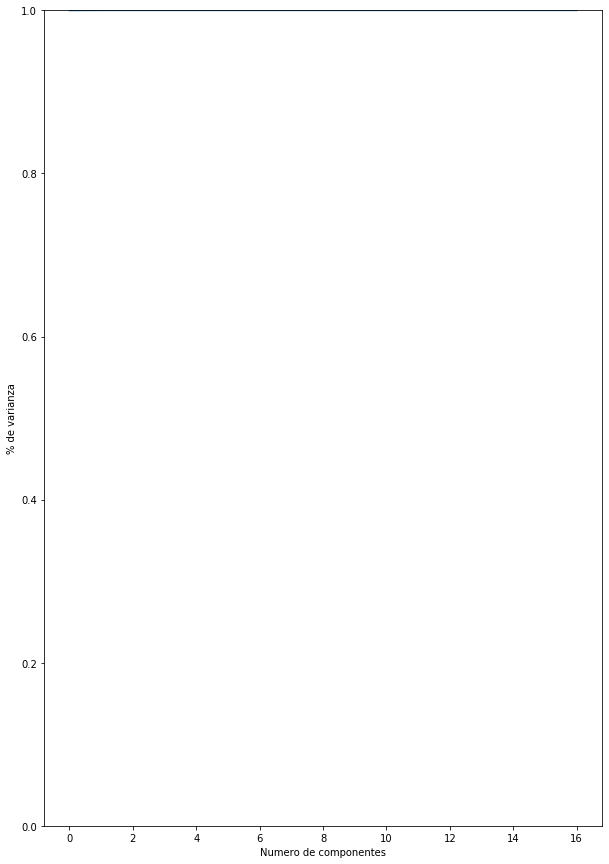

In [134]:
plt.figure(figsize=(10,15))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('% de varianza')
plt.ylim([0,1])
#Al parecer puedo reducir mucho mi df y mantener el % de varianza.

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor

## Modelización

In [136]:
X=df_encoded_woutliers.drop('price', axis=1)
y=df_encoded_woutliers.price
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [100]:
X=df_encoded.drop('price', axis=1)
y=df_encoded.price
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

#### Regresión logística

In [137]:
linreg=LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
train_score=linreg.score(X_train, y_train)
test_score=linreg.score(X_test, y_test)
print (train_score, test_score)

0.3765581829786089 0.3908751192601575


In [139]:
rmse=mse(y_test, linreg.predict(X_test))**(0.5)
rmse

64.15328631918672

#### Lasso

In [140]:
lasso=Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
train_score=lasso.score(X_train, y_train)
test_score=lasso.score(X_test, y_test)
print (train_score, test_score)

0.36924879731822813 0.38355454725373594


In [142]:
rmse=mse(y_test, lasso.predict(X_test))**(0.5)
rmse

64.53763781429718

#### Ridge(L2)

In [143]:
ridge=Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [144]:
train_score=ridge.score(X_train, y_train)
test_score=ridge.score(X_test, y_test)
print (train_score, test_score)

0.37655793594533316 0.3908724112269927


In [145]:
rmse=mse(y_test, ridge.predict(X_test))**(0.5)
rmse

64.15342892461904

#### Elastic

In [146]:
elastic=ElasticNet(alpha=0.01)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [147]:
train_score=elastic.score(X_train, y_train)
test_score=elastic.score(X_test, y_test)
print (train_score, test_score)

0.3758186625124551 0.38989248597472226


In [148]:
rmse=mse(y_test, elastic.predict(X_test))**(0.5)
rmse

64.20501114070932

#### Random Forest

In [149]:
rf=RFR()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [150]:
train_score=rf.score(X_train, y_train)
test_score=rf.score(X_test, y_test)
print (train_score, test_score)
#overfitting

0.892167969025011 0.4865065839992462


In [151]:
rmse=mse(y_test, rf.predict(X_test))**(0.5)
rmse

58.90242548204066

#### Árbol de desición

In [152]:
dtree=DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [153]:
train_score=dtree.score(X_train, y_train)
test_score=dtree.score(X_test, y_test)
print (train_score, test_score)

1.0 0.027867169363671063


In [154]:
rmse=mse(y_test, dtree.predict(X_test))**(0.5)
rmse

81.04543244485549

#### CatBoost

In [155]:
from catboost import CatBoostRegressor as CTR
ctr=CTR()
ctr.fit(X_train, y_train)

0:	learn: 86.1531568	total: 29.1ms	remaining: 29.1s
1:	learn: 85.1290108	total: 41ms	remaining: 20.5s
2:	learn: 84.1764769	total: 50.7ms	remaining: 16.8s
3:	learn: 83.2306639	total: 58.7ms	remaining: 14.6s
4:	learn: 82.3497928	total: 66.6ms	remaining: 13.2s
5:	learn: 81.4900550	total: 72.5ms	remaining: 12s
6:	learn: 80.6340718	total: 77ms	remaining: 10.9s
7:	learn: 79.8704378	total: 81.7ms	remaining: 10.1s
8:	learn: 79.1194047	total: 86ms	remaining: 9.47s
9:	learn: 78.4111741	total: 90.4ms	remaining: 8.95s
10:	learn: 77.6993575	total: 94.6ms	remaining: 8.51s
11:	learn: 77.0543203	total: 98.8ms	remaining: 8.14s
12:	learn: 76.4224014	total: 103ms	remaining: 7.82s
13:	learn: 75.8135548	total: 108ms	remaining: 7.61s
14:	learn: 75.2257650	total: 113ms	remaining: 7.39s
15:	learn: 74.6358301	total: 116ms	remaining: 7.12s
16:	learn: 74.1371198	total: 121ms	remaining: 6.97s
17:	learn: 73.5709189	total: 125ms	remaining: 6.82s
18:	learn: 73.1090346	total: 129ms	remaining: 6.64s
19:	learn: 72.6622

167:	learn: 59.4140353	total: 881ms	remaining: 4.36s
168:	learn: 59.3964231	total: 886ms	remaining: 4.36s
169:	learn: 59.3687009	total: 893ms	remaining: 4.36s
170:	learn: 59.3480404	total: 897ms	remaining: 4.35s
171:	learn: 59.3223128	total: 902ms	remaining: 4.34s
172:	learn: 59.3035847	total: 908ms	remaining: 4.34s
173:	learn: 59.2873323	total: 912ms	remaining: 4.33s
174:	learn: 59.2759874	total: 918ms	remaining: 4.33s
175:	learn: 59.2541076	total: 923ms	remaining: 4.32s
176:	learn: 59.2354902	total: 927ms	remaining: 4.31s
177:	learn: 59.2087437	total: 938ms	remaining: 4.33s
178:	learn: 59.1898340	total: 943ms	remaining: 4.33s
179:	learn: 59.1794712	total: 950ms	remaining: 4.33s
180:	learn: 59.1539924	total: 954ms	remaining: 4.32s
181:	learn: 59.1363884	total: 962ms	remaining: 4.33s
182:	learn: 59.1143989	total: 972ms	remaining: 4.34s
183:	learn: 59.0914746	total: 979ms	remaining: 4.34s
184:	learn: 59.0562511	total: 984ms	remaining: 4.33s
185:	learn: 59.0467091	total: 993ms	remaining:

329:	learn: 57.1452139	total: 1.54s	remaining: 3.13s
330:	learn: 57.1343122	total: 1.55s	remaining: 3.13s
331:	learn: 57.1167041	total: 1.55s	remaining: 3.12s
332:	learn: 57.1030979	total: 1.55s	remaining: 3.11s
333:	learn: 57.0666025	total: 1.56s	remaining: 3.1s
334:	learn: 57.0516998	total: 1.56s	remaining: 3.1s
335:	learn: 57.0365145	total: 1.56s	remaining: 3.09s
336:	learn: 57.0310942	total: 1.57s	remaining: 3.08s
337:	learn: 57.0185366	total: 1.57s	remaining: 3.07s
338:	learn: 57.0100739	total: 1.57s	remaining: 3.07s
339:	learn: 56.9904894	total: 1.57s	remaining: 3.06s
340:	learn: 56.9830961	total: 1.58s	remaining: 3.05s
341:	learn: 56.9647190	total: 1.58s	remaining: 3.04s
342:	learn: 56.9472426	total: 1.59s	remaining: 3.04s
343:	learn: 56.9351090	total: 1.59s	remaining: 3.03s
344:	learn: 56.9293551	total: 1.59s	remaining: 3.03s
345:	learn: 56.9195805	total: 1.6s	remaining: 3.02s
346:	learn: 56.9029312	total: 1.6s	remaining: 3.02s
347:	learn: 56.8960377	total: 1.61s	remaining: 3.0

491:	learn: 55.4991315	total: 2.37s	remaining: 2.45s
492:	learn: 55.4966125	total: 2.38s	remaining: 2.45s
493:	learn: 55.4851587	total: 2.38s	remaining: 2.44s
494:	learn: 55.4808817	total: 2.39s	remaining: 2.44s
495:	learn: 55.4803385	total: 2.39s	remaining: 2.43s
496:	learn: 55.4742719	total: 2.4s	remaining: 2.43s
497:	learn: 55.4695843	total: 2.41s	remaining: 2.43s
498:	learn: 55.4610890	total: 2.41s	remaining: 2.42s
499:	learn: 55.4559944	total: 2.42s	remaining: 2.42s
500:	learn: 55.4502045	total: 2.44s	remaining: 2.43s
501:	learn: 55.4334441	total: 2.44s	remaining: 2.42s
502:	learn: 55.4258024	total: 2.45s	remaining: 2.42s
503:	learn: 55.4237227	total: 2.45s	remaining: 2.41s
504:	learn: 55.4154477	total: 2.46s	remaining: 2.41s
505:	learn: 55.4008430	total: 2.47s	remaining: 2.41s
506:	learn: 55.3925074	total: 2.48s	remaining: 2.41s
507:	learn: 55.3866796	total: 2.48s	remaining: 2.4s
508:	learn: 55.3767702	total: 2.48s	remaining: 2.4s
509:	learn: 55.3684000	total: 2.5s	remaining: 2.4

686:	learn: 54.2705584	total: 3.2s	remaining: 1.46s
687:	learn: 54.2518394	total: 3.2s	remaining: 1.45s
688:	learn: 54.2505058	total: 3.2s	remaining: 1.45s
689:	learn: 54.2433232	total: 3.21s	remaining: 1.44s
690:	learn: 54.2343282	total: 3.21s	remaining: 1.44s
691:	learn: 54.2288122	total: 3.21s	remaining: 1.43s
692:	learn: 54.2210272	total: 3.22s	remaining: 1.43s
693:	learn: 54.2106172	total: 3.22s	remaining: 1.42s
694:	learn: 54.2077865	total: 3.23s	remaining: 1.42s
695:	learn: 54.2020763	total: 3.23s	remaining: 1.41s
696:	learn: 54.2005888	total: 3.23s	remaining: 1.41s
697:	learn: 54.1939168	total: 3.24s	remaining: 1.4s
698:	learn: 54.1823190	total: 3.24s	remaining: 1.39s
699:	learn: 54.1810696	total: 3.24s	remaining: 1.39s
700:	learn: 54.1716663	total: 3.25s	remaining: 1.38s
701:	learn: 54.1693456	total: 3.25s	remaining: 1.38s
702:	learn: 54.1640219	total: 3.25s	remaining: 1.37s
703:	learn: 54.1490908	total: 3.26s	remaining: 1.37s
704:	learn: 54.1428317	total: 3.27s	remaining: 1.3

870:	learn: 53.1036446	total: 3.87s	remaining: 573ms
871:	learn: 53.0959509	total: 3.88s	remaining: 569ms
872:	learn: 53.0887495	total: 3.88s	remaining: 564ms
873:	learn: 53.0876132	total: 3.88s	remaining: 560ms
874:	learn: 53.0827338	total: 3.88s	remaining: 555ms
875:	learn: 53.0764916	total: 3.89s	remaining: 551ms
876:	learn: 53.0692956	total: 3.89s	remaining: 546ms
877:	learn: 53.0640446	total: 3.89s	remaining: 541ms
878:	learn: 53.0586570	total: 3.9s	remaining: 537ms
879:	learn: 53.0541144	total: 3.9s	remaining: 532ms
880:	learn: 53.0461781	total: 3.91s	remaining: 528ms
881:	learn: 53.0424825	total: 3.91s	remaining: 523ms
882:	learn: 53.0341798	total: 3.91s	remaining: 519ms
883:	learn: 53.0259344	total: 3.92s	remaining: 514ms
884:	learn: 53.0200112	total: 3.92s	remaining: 510ms
885:	learn: 53.0121682	total: 3.93s	remaining: 505ms
886:	learn: 53.0053239	total: 3.93s	remaining: 501ms
887:	learn: 53.0007975	total: 3.93s	remaining: 496ms
888:	learn: 52.9951347	total: 3.94s	remaining: 4

In [66]:
ctr.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'boosting_type': 'Plain',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.1000000015,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'approx_on_full_history': False,
 'subsample': 0.8000000119,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'has_time': False,
 'fold_len_multiplier': 2,
 'border_count': 254,
 'classes_count': 0,
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'loss_function': 'RMSE',
 'learning_rate': 0.02999999933,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 1,
 'bootstrap_type': 'MVS',
 'permutation_count': 4}

In [156]:
train_score=ctr.score(X_train, y_train)
test_score=ctr.score(X_test, y_test)
print (train_score, test_score)

0.6396186658303975 0.548237617125976


In [157]:
mse(y_test, ctr.predict(X_test))**(0.5)

55.24853563654561

#### LightGMB

In [161]:
from lightgbm import LGBMRegressor as LGBMR
lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)

LightGBMError: Do not support special JSON characters in feature name.

In [74]:
train_score=lgbmr.score(X_train, y_train)
test_score=lgbmr.score(X_test, y_test)
print (train_score, test_score)

0.7479041434678058 0.5758393286583672


In [160]:
mse(y_test, lgbmr.predict(X_test))**(0.5)

NotFittedError: No booster found. Need to call fit beforehand.

#### xgboost

In [162]:
from xgboost import XGBRegressor as XGBR
xgbr=XGBR()
xgbr.fit(X_train, y_train)

[17:52:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [163]:
train_score=xgbr.score(X_train, y_train)
test_score=xgbr.score(X_test, y_test)
print (train_score, test_score)

0.5321928563353729 0.5305557405908417


In [164]:
mse(y_test, xgbr.predict(X_test))**(0.5)

56.319365729484375

#### GradientBoostingRegressor

In [165]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
gbr=GBR(min_samples_leaf=2,min_samples_split=4,n_estimators=200)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [166]:
train_score=gbr.score(X_train, y_train)
test_score=gbr.score(X_test, y_test)
print (train_score, test_score)

0.5546278844951267 0.5351659202088411


In [167]:
mse(y_test, gbr.predict(X_test))**(0.5)

56.04214112718273

## GridSearching con Random Forest

In [75]:
from sklearn.model_selection import GridSearchCV

def grid(modelo, param, cv=5):
    grid=GridSearchCV(modelo, param, cv=cv, iid=True, n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print (grid.score(X_train, y_train), grid.score(X_test, y_test))
    print (grid.best_params_)
    print (grid.best_score_)
    print (mse(y_test, grid.predict(X_test))**(0.5))
    
    return grid.best_estimator_.fit(X_train, y_train)

In [77]:
param={'min_samples_leaf':[2,5,10], 'n_estimators':[50,80,100,150],'min_samples_split':[2,4,8]}

In [78]:
rf_gs= grid(rf, param)

0.8359173341700051 0.5803948633492341
{'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 50}
0.6112298619436771
83.35838428782769


## Agregando PCA

In [85]:
pca=PCA(n_components=10)
df_pca=pd.DataFrame(pca.fit_transform(df_encoded))

#### Random forest con PCA

In [86]:
df_pca['price']=df.price
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,price
0,23.362648,-26.403148,1.616283,-1.655336,-4.489463,-0.586631,-0.445382,-0.500214,-0.752543,0.732105,169.0
1,-60.595318,-31.233808,-5.836253,-0.146460,0.514993,-0.660137,-0.809620,0.289807,-0.223238,0.565277,85.0
2,-25.754236,-24.474885,1.241944,-0.853516,0.935581,1.417425,0.009380,-0.353791,0.093598,-0.600173,120.0
3,-28.986853,125.482949,-4.894029,-0.227243,1.314223,0.326262,0.507654,0.072881,-0.268753,0.259741,120.0
4,-47.326612,48.074886,1.189537,-3.041963,0.363281,-0.365929,-0.547801,0.306885,-0.390688,-0.227952,100.0


In [87]:
X=df_pca.drop('price', axis=1)
y=df_pca.price
X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(X,y, test_size=0.2)

In [88]:
rf=RFR()
rf.fit(X_train_pca, y_train_pca)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [89]:
train_score=rf.score(X_train_pca, y_train_pca)
test_score=rf.score(X_test_pca, y_test_pca)
print (train_score, test_score)

0.9999738740699688 0.9999414606541157


#### Regresión logística con PCA

In [90]:
linreg=LinearRegression()
linreg.fit(X_train_pca, y_train_pca)
train_score=linreg.score(X_train_pca, y_train_pca)
test_score=linreg.score(X_test_pca, y_test_pca)
print (train_score, test_score)

0.9999999999764352 0.9999999999723186


## Selección de variables más significativas

In [102]:
from sklearn.feature_selection import f_regression
ffs = f_regression(X,y)

In [103]:
ffs

(array([7.33222951e+01, 6.78682116e+03, 1.47277169e+04, 7.81208224e+03,
        7.18286667e+02, 3.52990689e+02, 7.88350918e+00, 2.62413693e+01,
        8.65507009e+01, 1.06064627e+02, 1.25158878e+04, 9.09705940e+03,
        3.84067875e-01, 1.14232859e+03, 2.60738040e+02]),
 array([1.15500165e-017, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        2.58792565e-156, 2.77494436e-078, 4.99210420e-003, 3.03234655e-007,
        1.45524410e-020, 7.87954245e-025, 0.00000000e+000, 0.00000000e+000,
        5.35439069e-001, 1.28393046e-245, 2.13644303e-058]))

In [111]:
for e in range(len(ffs[0])):
    print("F-Value #{}" .format(e),":",ffs[0][e])
    print("P-Value #{}" .format(e),":",ffs[1][e])

F-Value #0 : 73.32229507791834
P-Value #0 : 1.1550016547206082e-17
F-Value #1 : 6786.821155104839
P-Value #1 : 0.0
F-Value #2 : 14727.716903106795
P-Value #2 : 0.0
F-Value #3 : 7812.082236741376
P-Value #3 : 0.0
F-Value #4 : 718.286667104641
P-Value #4 : 2.587925648339194e-156
F-Value #5 : 352.99068933415856
P-Value #5 : 2.774944358385803e-78
F-Value #6 : 7.883509183017264
P-Value #6 : 0.004992104198853961
F-Value #7 : 26.241369328833237
P-Value #7 : 3.0323465450210593e-07
F-Value #8 : 86.55070091970953
P-Value #8 : 1.4552441010404418e-20
F-Value #9 : 106.06462708216696
P-Value #9 : 7.879542454866273e-25
F-Value #10 : 12515.887827519775
P-Value #10 : 0.0
F-Value #11 : 9097.059400692917
P-Value #11 : 0.0
F-Value #12 : 0.38406787517819807
P-Value #12 : 0.5354390687703336
F-Value #13 : 1142.3285881739298
P-Value #13 : 1.2839304629684649e-245
F-Value #14 : 260.73804009617976
P-Value #14 : 2.1364430349829874e-58


In [112]:
X.columns

Index(['property_type', 'room_type', 'accommodates', 'bathrooms',
       'cancellation_policy', 'cleaning_fee', 'host_identity_verified',
       'instant_bookable', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'host_response', 'amenities_ratio', 'regions'],
      dtype='object')

## Stacking

In [80]:
n_df=pd.DataFrame()

In [81]:
n_df['xgbr']=xgbr.fit(X_train, y_train).predict(X_test)

[17:52:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [82]:
n_df['lbgmr']=lgbmr.fit(X_train, y_train).predict(X_test)

In [83]:
n_df['ctr']=ctr.fit(X_train, y_train).predict(X_test)

0:	learn: 130.3732236	total: 23.1ms	remaining: 23.1s
1:	learn: 128.5597643	total: 31.5ms	remaining: 15.7s
2:	learn: 126.8979818	total: 36.9ms	remaining: 12.2s
3:	learn: 125.1623194	total: 42.8ms	remaining: 10.6s
4:	learn: 123.4833325	total: 47.3ms	remaining: 9.42s
5:	learn: 121.8431847	total: 52.8ms	remaining: 8.75s
6:	learn: 120.2754997	total: 57.5ms	remaining: 8.15s
7:	learn: 118.7828804	total: 62.7ms	remaining: 7.78s
8:	learn: 117.3917505	total: 69.8ms	remaining: 7.68s
9:	learn: 116.0257628	total: 74.9ms	remaining: 7.41s
10:	learn: 114.7272691	total: 80.8ms	remaining: 7.26s
11:	learn: 113.4987842	total: 86ms	remaining: 7.08s
12:	learn: 112.3817898	total: 91.6ms	remaining: 6.95s
13:	learn: 111.2149297	total: 95.8ms	remaining: 6.74s
14:	learn: 110.1039542	total: 101ms	remaining: 6.65s
15:	learn: 109.0258831	total: 106ms	remaining: 6.51s
16:	learn: 108.0097791	total: 112ms	remaining: 6.47s
17:	learn: 107.0603493	total: 117ms	remaining: 6.38s
18:	learn: 106.1149223	total: 121ms	remainin

170:	learn: 78.6945139	total: 1.08s	remaining: 5.24s
171:	learn: 78.6608927	total: 1.09s	remaining: 5.24s
172:	learn: 78.6050668	total: 1.09s	remaining: 5.23s
173:	learn: 78.5780398	total: 1.1s	remaining: 5.23s
174:	learn: 78.5416273	total: 1.11s	remaining: 5.24s
175:	learn: 78.5093722	total: 1.12s	remaining: 5.25s
176:	learn: 78.4841333	total: 1.14s	remaining: 5.31s
177:	learn: 78.4538411	total: 1.15s	remaining: 5.31s
178:	learn: 78.3981635	total: 1.16s	remaining: 5.3s
179:	learn: 78.3509261	total: 1.16s	remaining: 5.28s
180:	learn: 78.3272437	total: 1.16s	remaining: 5.27s
181:	learn: 78.2895941	total: 1.17s	remaining: 5.26s
182:	learn: 78.2567687	total: 1.17s	remaining: 5.24s
183:	learn: 78.2253302	total: 1.18s	remaining: 5.23s
184:	learn: 78.1968247	total: 1.19s	remaining: 5.23s
185:	learn: 78.1474409	total: 1.19s	remaining: 5.23s
186:	learn: 78.1229832	total: 1.21s	remaining: 5.26s
187:	learn: 78.0960434	total: 1.22s	remaining: 5.26s
188:	learn: 78.0735194	total: 1.23s	remaining: 5

342:	learn: 74.7582898	total: 2.31s	remaining: 4.42s
343:	learn: 74.7286173	total: 2.31s	remaining: 4.42s
344:	learn: 74.7168295	total: 2.32s	remaining: 4.41s
345:	learn: 74.6901052	total: 2.33s	remaining: 4.4s
346:	learn: 74.6730203	total: 2.33s	remaining: 4.39s
347:	learn: 74.6529435	total: 2.34s	remaining: 4.39s
348:	learn: 74.6205448	total: 2.35s	remaining: 4.38s
349:	learn: 74.6110265	total: 2.35s	remaining: 4.37s
350:	learn: 74.5902228	total: 2.36s	remaining: 4.36s
351:	learn: 74.5779346	total: 2.36s	remaining: 4.35s
352:	learn: 74.5606089	total: 2.37s	remaining: 4.34s
353:	learn: 74.5523627	total: 2.38s	remaining: 4.33s
354:	learn: 74.5257559	total: 2.38s	remaining: 4.33s
355:	learn: 74.5028124	total: 2.39s	remaining: 4.33s
356:	learn: 74.4948153	total: 2.4s	remaining: 4.32s
357:	learn: 74.4856108	total: 2.4s	remaining: 4.31s
358:	learn: 74.4657288	total: 2.41s	remaining: 4.3s
359:	learn: 74.4475757	total: 2.42s	remaining: 4.3s
360:	learn: 74.4286228	total: 2.43s	remaining: 4.29

501:	learn: 72.3167814	total: 3.56s	remaining: 3.53s
502:	learn: 72.3004468	total: 3.57s	remaining: 3.52s
503:	learn: 72.2926849	total: 3.58s	remaining: 3.52s
504:	learn: 72.2843925	total: 3.59s	remaining: 3.52s
505:	learn: 72.2710573	total: 3.6s	remaining: 3.52s
506:	learn: 72.2635725	total: 3.61s	remaining: 3.51s
507:	learn: 72.2485997	total: 3.62s	remaining: 3.51s
508:	learn: 72.2440723	total: 3.63s	remaining: 3.5s
509:	learn: 72.2368827	total: 3.63s	remaining: 3.49s
510:	learn: 72.2307449	total: 3.64s	remaining: 3.48s
511:	learn: 72.2221409	total: 3.65s	remaining: 3.48s
512:	learn: 72.2152695	total: 3.66s	remaining: 3.47s
513:	learn: 72.2106204	total: 3.66s	remaining: 3.46s
514:	learn: 72.1933323	total: 3.67s	remaining: 3.45s
515:	learn: 72.1847061	total: 3.68s	remaining: 3.45s
516:	learn: 72.1700422	total: 3.69s	remaining: 3.45s
517:	learn: 72.1542684	total: 3.69s	remaining: 3.44s
518:	learn: 72.1398823	total: 3.7s	remaining: 3.43s
519:	learn: 72.1284526	total: 3.71s	remaining: 3.

684:	learn: 70.5466994	total: 4.78s	remaining: 2.2s
685:	learn: 70.5358601	total: 4.79s	remaining: 2.19s
686:	learn: 70.5311377	total: 4.79s	remaining: 2.18s
687:	learn: 70.5188611	total: 4.8s	remaining: 2.17s
688:	learn: 70.5106485	total: 4.8s	remaining: 2.17s
689:	learn: 70.5024384	total: 4.81s	remaining: 2.16s
690:	learn: 70.4993949	total: 4.81s	remaining: 2.15s
691:	learn: 70.4747436	total: 4.82s	remaining: 2.15s
692:	learn: 70.4679390	total: 4.83s	remaining: 2.14s
693:	learn: 70.4648135	total: 4.83s	remaining: 2.13s
694:	learn: 70.4613045	total: 4.85s	remaining: 2.13s
695:	learn: 70.4567738	total: 4.85s	remaining: 2.12s
696:	learn: 70.4430819	total: 4.86s	remaining: 2.11s
697:	learn: 70.4309059	total: 4.86s	remaining: 2.1s
698:	learn: 70.4281902	total: 4.87s	remaining: 2.1s
699:	learn: 70.4251684	total: 4.87s	remaining: 2.09s
700:	learn: 70.4173683	total: 4.88s	remaining: 2.08s
701:	learn: 70.4044695	total: 4.88s	remaining: 2.07s
702:	learn: 70.3959648	total: 4.89s	remaining: 2.06

843:	learn: 69.1770638	total: 5.66s	remaining: 1.05s
844:	learn: 69.1666664	total: 5.66s	remaining: 1.04s
845:	learn: 69.1579306	total: 5.67s	remaining: 1.03s
846:	learn: 69.1489598	total: 5.67s	remaining: 1.02s
847:	learn: 69.1415585	total: 5.68s	remaining: 1.02s
848:	learn: 69.1342790	total: 5.68s	remaining: 1.01s
849:	learn: 69.1281466	total: 5.69s	remaining: 1s
850:	learn: 69.1227449	total: 5.7s	remaining: 998ms
851:	learn: 69.1181584	total: 5.71s	remaining: 991ms
852:	learn: 69.1117451	total: 5.71s	remaining: 984ms
853:	learn: 69.1031281	total: 5.72s	remaining: 977ms
854:	learn: 69.0965509	total: 5.72s	remaining: 971ms
855:	learn: 69.0927199	total: 5.74s	remaining: 966ms
856:	learn: 69.0906694	total: 5.74s	remaining: 958ms
857:	learn: 69.0887361	total: 5.75s	remaining: 952ms
858:	learn: 69.0801802	total: 5.75s	remaining: 945ms
859:	learn: 69.0775204	total: 5.76s	remaining: 937ms
860:	learn: 69.0696745	total: 5.76s	remaining: 930ms
861:	learn: 69.0678581	total: 5.77s	remaining: 923

In [84]:
n_df['gbr']=gbr.fit(X_train, y_train).predict(X_test)

In [85]:
n_df['linreg']=linreg.fit(X_train, y_train).predict(X_test)

In [86]:
grid=GridSearchCV(rf, param, cv=5, iid=True, n_jobs=-1)
n_df['grid_rf']=grid.fit(X_train, y_train).predict(X_test)

In [91]:
n_df.head(), n_df.shape, y_test.shape

(         xgbr       lbgmr         ctr         gbr      linreg     grid_rf
 0   51.072552   36.518185   42.421424   24.755268   44.265021   41.105997
 1  426.830170  361.344154  398.471019  428.961044  410.644632  385.343598
 2  120.370201  120.959162  121.495389  127.733713  130.720813  130.834923
 3  205.952423  216.371964  223.395927  215.532553  262.568298  171.844839
 4  396.652649  373.212993  406.455483  399.396739  346.474620  480.307905,
 (5776, 6),
 (5776,))

In [109]:
linreg_stack=LinearRegression()
linreg_stack.fit(n_df.values, y_test)
linreg_stack.score(n_df.values, y_test)

0.6189516887572408

In [169]:
from mlxtend.regressor import StackingRegressor

metamodelo=StackingRegressor(regressors=[xgbr, gbr, rf, ctr], meta_regressor=linreg)
metamodelo.fit(X_train, y_train)

[17:53:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 86.1531568	total: 3.94ms	remaining: 3.94s
1:	learn: 85.1290108	total: 7.67ms	remaining: 3.83s
2:	learn: 84.1764769	total: 10.9ms	remaining: 3.63s
3:	learn: 83.2306639	total: 14.3ms	remaining: 3.55s
4:	learn: 82.3497928	total: 17.8ms	remaining: 3.53s
5:	learn: 81.4900550	total: 21.3ms	remaining: 3.53s
6:	learn: 80.6340718	total: 24.7ms	remaining: 3.5s
7:	learn: 79.8704378	total: 27.9ms	remaining: 3.46s
8:	learn: 79.1194047	total: 31.7ms	remaining: 3.49s
9:	learn: 78.4111741	total: 35ms	remaining: 3.47s
10:	learn: 77.6993575	total: 38.3ms	remaining: 3.44s
11:	learn: 77.0543203	total: 41.5ms	remaining: 3.41s
12:	learn: 76.4224014	total: 44.9ms	remaining: 3.4s
13:	learn: 75.8135548	total: 48.2ms	remaining: 3.4s
14:	learn: 75.2257650	total: 51.6ms	remaining: 3.39s
15:	learn: 74.6358301	total: 55.1ms	remaining: 3.39s
16:

183:	learn: 59.0914746	total: 680ms	remaining: 3.02s
184:	learn: 59.0562511	total: 684ms	remaining: 3.01s
185:	learn: 59.0467091	total: 687ms	remaining: 3.01s
186:	learn: 59.0329192	total: 690ms	remaining: 3s
187:	learn: 59.0070968	total: 694ms	remaining: 3s
188:	learn: 58.9921024	total: 697ms	remaining: 2.99s
189:	learn: 58.9771143	total: 701ms	remaining: 2.99s
190:	learn: 58.9622306	total: 704ms	remaining: 2.98s
191:	learn: 58.9394015	total: 706ms	remaining: 2.97s
192:	learn: 58.9206360	total: 709ms	remaining: 2.96s
193:	learn: 58.9083630	total: 712ms	remaining: 2.96s
194:	learn: 58.8983003	total: 715ms	remaining: 2.95s
195:	learn: 58.8668234	total: 719ms	remaining: 2.95s
196:	learn: 58.8594034	total: 723ms	remaining: 2.95s
197:	learn: 58.8497334	total: 726ms	remaining: 2.94s
198:	learn: 58.8236289	total: 730ms	remaining: 2.94s
199:	learn: 58.8101363	total: 733ms	remaining: 2.93s
200:	learn: 58.8023281	total: 737ms	remaining: 2.93s
201:	learn: 58.7826494	total: 741ms	remaining: 2.93s

372:	learn: 56.5944268	total: 1.36s	remaining: 2.28s
373:	learn: 56.5843258	total: 1.36s	remaining: 2.28s
374:	learn: 56.5694166	total: 1.36s	remaining: 2.27s
375:	learn: 56.5605877	total: 1.37s	remaining: 2.27s
376:	learn: 56.5476468	total: 1.37s	remaining: 2.27s
377:	learn: 56.5396380	total: 1.37s	remaining: 2.26s
378:	learn: 56.5182563	total: 1.38s	remaining: 2.26s
379:	learn: 56.5122910	total: 1.38s	remaining: 2.25s
380:	learn: 56.5000409	total: 1.38s	remaining: 2.25s
381:	learn: 56.4933233	total: 1.39s	remaining: 2.25s
382:	learn: 56.4862059	total: 1.39s	remaining: 2.24s
383:	learn: 56.4805290	total: 1.4s	remaining: 2.24s
384:	learn: 56.4711841	total: 1.4s	remaining: 2.23s
385:	learn: 56.4614530	total: 1.4s	remaining: 2.23s
386:	learn: 56.4497731	total: 1.41s	remaining: 2.23s
387:	learn: 56.4385690	total: 1.41s	remaining: 2.22s
388:	learn: 56.4288723	total: 1.41s	remaining: 2.22s
389:	learn: 56.4229396	total: 1.42s	remaining: 2.22s
390:	learn: 56.4167437	total: 1.42s	remaining: 2.

558:	learn: 55.0183485	total: 2.18s	remaining: 1.72s
559:	learn: 55.0090612	total: 2.19s	remaining: 1.72s
560:	learn: 55.0051059	total: 2.19s	remaining: 1.71s
561:	learn: 55.0025545	total: 2.19s	remaining: 1.71s
562:	learn: 54.9994225	total: 2.2s	remaining: 1.7s
563:	learn: 54.9966367	total: 2.2s	remaining: 1.7s
564:	learn: 54.9914423	total: 2.2s	remaining: 1.7s
565:	learn: 54.9776744	total: 2.21s	remaining: 1.69s
566:	learn: 54.9686908	total: 2.21s	remaining: 1.69s
567:	learn: 54.9640246	total: 2.21s	remaining: 1.68s
568:	learn: 54.9563566	total: 2.21s	remaining: 1.68s
569:	learn: 54.9528005	total: 2.22s	remaining: 1.67s
570:	learn: 54.9494952	total: 2.22s	remaining: 1.67s
571:	learn: 54.9374849	total: 2.23s	remaining: 1.67s
572:	learn: 54.9328576	total: 2.23s	remaining: 1.66s
573:	learn: 54.9241850	total: 2.23s	remaining: 1.66s
574:	learn: 54.9121311	total: 2.24s	remaining: 1.65s
575:	learn: 54.9044317	total: 2.24s	remaining: 1.65s
576:	learn: 54.8946745	total: 2.24s	remaining: 1.64s

732:	learn: 53.9712114	total: 2.85s	remaining: 1.04s
733:	learn: 53.9643530	total: 2.86s	remaining: 1.03s
734:	learn: 53.9590872	total: 2.86s	remaining: 1.03s
735:	learn: 53.9579962	total: 2.87s	remaining: 1.03s
736:	learn: 53.9550037	total: 2.87s	remaining: 1.02s
737:	learn: 53.9483456	total: 2.87s	remaining: 1.02s
738:	learn: 53.9428467	total: 2.88s	remaining: 1.01s
739:	learn: 53.9380723	total: 2.88s	remaining: 1.01s
740:	learn: 53.9351512	total: 2.88s	remaining: 1.01s
741:	learn: 53.9184907	total: 2.88s	remaining: 1s
742:	learn: 53.9112966	total: 2.89s	remaining: 999ms
743:	learn: 53.8992476	total: 2.89s	remaining: 995ms
744:	learn: 53.8961116	total: 2.89s	remaining: 991ms
745:	learn: 53.8896360	total: 2.9s	remaining: 987ms
746:	learn: 53.8831166	total: 2.9s	remaining: 983ms
747:	learn: 53.8743628	total: 2.9s	remaining: 979ms
748:	learn: 53.8639674	total: 2.91s	remaining: 975ms
749:	learn: 53.8613189	total: 2.91s	remaining: 971ms
750:	learn: 53.8537529	total: 2.92s	remaining: 967ms

902:	learn: 52.8884931	total: 3.53s	remaining: 379ms
903:	learn: 52.8853599	total: 3.54s	remaining: 376ms
904:	learn: 52.8788871	total: 3.54s	remaining: 372ms
905:	learn: 52.8707475	total: 3.55s	remaining: 368ms
906:	learn: 52.8641538	total: 3.56s	remaining: 365ms
907:	learn: 52.8589304	total: 3.56s	remaining: 361ms
908:	learn: 52.8572373	total: 3.57s	remaining: 357ms
909:	learn: 52.8537705	total: 3.58s	remaining: 354ms
910:	learn: 52.8462334	total: 3.58s	remaining: 350ms
911:	learn: 52.8437487	total: 3.59s	remaining: 347ms
912:	learn: 52.8351533	total: 3.6s	remaining: 343ms
913:	learn: 52.8280108	total: 3.61s	remaining: 339ms
914:	learn: 52.8237556	total: 3.61s	remaining: 336ms
915:	learn: 52.8165223	total: 3.63s	remaining: 333ms
916:	learn: 52.8127227	total: 3.64s	remaining: 329ms
917:	learn: 52.8074418	total: 3.65s	remaining: 326ms
918:	learn: 52.8022942	total: 3.65s	remaining: 322ms
919:	learn: 52.7862860	total: 3.65s	remaining: 318ms
920:	learn: 52.7780085	total: 3.66s	remaining: 

StackingRegressor(meta_regressor=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  refit=True,
                  regressors=[XGBRegressor(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           importance_type='gain',
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_es...
                                                    max_leaf_nodes=None,
                                                    min_impurity_decr

In [170]:
train_score=metamodelo.score(X_train, y_train)
test_score=metamodelo.score(X_test, y_test)
print (train_score, test_score)

0.921029953014258 0.3867787452655589


In [171]:
mse(y_test, metamodelo.predict(X_test))**(0.5)

64.36864076862149